# LAB 3 : Associative Networks 

Name : Vaishnavi, Joshitha

Roll Number : 180020039, 180020009

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


#**Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Objectives:
 To demonstrate the working principle of two layer auto-associative network.

## Hypothesis : 
The associative network will learn the weight values to correctly associate the input and output vectors using computation method, widrow and hebbian learning, and the suitable learning law for different input types will be learned.

## Experimental Description : 

1. For testing the limitaion of no. of patterns to input dimensionality, first genrated random data, using conditions L>M and L<=M , where l are the number of data pts and M is the dim of data. 

2. Generate the appropiate Input Data  : othonormal, orthogonal, linearly independent and linearly dependent input vector, for studying the effects of diff. inputs.

2. The different methods used for learning weights for the auto association task were:

    1. Weights by computation : W = B.A+
    2. Hebbs Learning Law : Wnew = Wold + lr * A * B.T
    3. Widrow's Learning Law : Wnew = Wold + lr * ((B-op)@A.T)


## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
import numpy as np
#L -- Number of Datapts 
#M -- Dim of data 
## L>M -- x
##L<=M -- learns wts.  

#Random Data
#Condition 1 : L <=M
L = 3
M = 4
x_1 = np.random.random((L, M)).T
print(x_1)
#Condition 2 : L > M
L = 15
M = 3
x_2 = np.random.random((L, M)).T
print(x_2)



#orthogonal matrix -- always a square matrix
from scipy.stats import ortho_group
import numpy as np
L = 3  #Number of Datapts 
M = 3  #Dim of data
x_ot = ortho_group.rvs(M)
print(x_ot)

#orthonormal vectors
x_on =(np.array([[np.sqrt(3)/3,np.sqrt(3)/3,np.sqrt(3)/3],[-np.sqrt(6)/6,np.sqrt(6)/3,-np.sqrt(6)/6],[-np.sqrt(2)/2,0,np.sqrt(2)/2]])).T
print(x_on)

#Linearly Independent Vectors
x_li=(np.array([[1,2,3],[2,1,3],[3,2,1]])).T
#x_li=(np.array([[1,2,3],[2,1,3]])).T
#x_li=(np.array([[1,2],[2,1],[3,2]])).T

print(x_li)


#Linearly dependent vectors
x_ld=(np.array([[1,2,3],[2,1,3],[4,2,6]])).T
print(x_ld)


[[0.98736188 0.95777215 0.05899404]
 [0.87362272 0.95364874 0.99848412]
 [0.26315794 0.51240251 0.82688671]
 [0.75948294 0.47256951 0.49864045]]
[[0.48636455 0.00845049 0.63330644 0.24065879 0.01525346 0.33405678
  0.16961477 0.81715553 0.25081293 0.50069977 0.72943595 0.57002821
  0.71861871 0.00279178 0.41753613]
 [0.95970818 0.92854603 0.81089716 0.80399503 0.50266834 0.85426799
  0.629427   0.09948015 0.53098071 0.12005149 0.41053111 0.46479693
  0.22402254 0.91567082 0.35030561]
 [0.04318701 0.17058789 0.31740405 0.34096776 0.64288835 0.95607777
  0.49033083 0.60402919 0.90310163 0.12804109 0.00245728 0.17676436
  0.03757606 0.69428641 0.05159699]]
[[-0.32201447  0.15909224  0.93327185]
 [-0.0695503   0.97914072 -0.19090889]
 [-0.94417659 -0.12638476 -0.30423257]]
[[ 0.57735027 -0.40824829 -0.70710678]
 [ 0.57735027  0.81649658  0.        ]
 [ 0.57735027 -0.40824829  0.70710678]]
[[1 2 3]
 [2 1 2]
 [3 3 1]]
[[1 2 4]
 [2 1 2]
 [3 3 6]]


In [ ]:
def weights_by_computation(A,B):

  ## Here A is input and B is output

  weights = B@np.linalg.pinv(A)## Write the weight equation here
  error = (np.square(np.linalg.norm(B-(weights@A))))*1/A.shape[1] ## Mean Squared Error

  return weights,np.round(error,8)


In [ ]:
def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  #weights = np.array([[0,0,0],[0,0,0],[0,0,0]])## Initialise weights here
  n = A.shape[0]
  weights = np.zeros([n, n])
  err = []
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    op=weights@A
    #change in weight
    #d_wghts=(1/A.shape[1])*(learning_rate*((B-op)@A.T))
    d_wghts=learning_rate*((B-op)@A.T)
    #update weight
    weights=weights+d_wghts
    #error computaion
    error=sum(sum(np.square(B-op)))
    err.append(error)


  return weights,err


In [ ]:
def weights_by_hebbian(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  import numpy as np
  #n = 4
  ## Initialise weights here
  #W = np.array([[0,0,0],[0,0,0],[0,0,0]])
  n = A.shape[0]
  W = np.zeros([n, n])

  ## Write the hebb learning training loop here
  err = []
  for epoch in range(num_epochs):
    for i in range(A.shape[1]):

      input=np.matrix(A[:,i]).T
      d_op=np.matrix(B[:,i]).T
      lr=1
    # Delta weights
      d_wghts=lr*input@d_op.T
    # Updated Weights
      W=W+d_wghts #w = w + lr*xi*yi
      #norm_wt=np.linalg.norm(W)
      #W = W/norm_wt

      #Output
      op = W@A
      #error
      error=(np.square(np.linalg.norm(B-(op))))*1/A.shape[1]
    #print(np.round(error,8))
    err.append(np.round(error,8))
    if np.round(error,8)==0 : 
      break
    

  return W, err

Condition :1: L<=M
By computation
[[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [-1.10321990e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Error:  0.0

Hebbs Law
[[10.  5.  0.  0.]
 [ 5.  5.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  5.]]
Error:  [2.33333333, 16.0, 42.33333333, 81.33333333, 133.0]


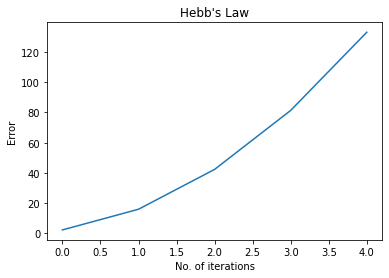


Widrow Law
[[0.95921279 0.06599228 0.         0.        ]
 [0.06599228 0.89322052 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.99342952]]
Error:  0.00842542


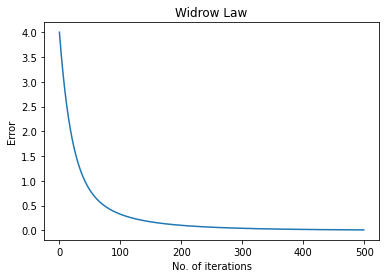



Condition : 2 - L>M
By computation
[[ 1.00000000e+00 -3.27002808e-17  2.77555756e-16]
 [ 2.22044605e-16  1.00000000e+00  8.32667268e-17]
 [ 6.66133815e-16 -3.27002808e-17  1.00000000e+00]]
Error:  0.0

Hebbs Law
[[15. 10.  5.]
 [10. 15. 10.]
 [ 5. 10. 15.]]
Error:  [37.2, 179.4, 428.4, 784.2, 1246.8]


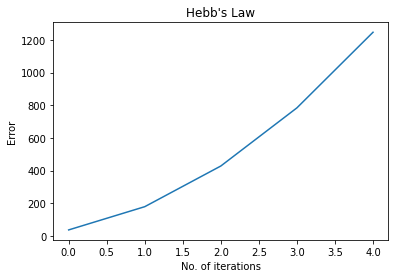


Widrow Law
[[ 0.99111795  0.01494181 -0.00884103]
 [ 0.01494181  0.97480601  0.01494181]
 [-0.00884103  0.01494181  0.99111795]]
Error:  0.00117084


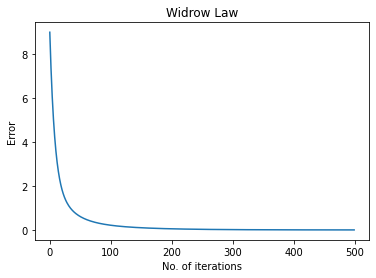



Orthogonal
By computation
[[ 1.00000000e+00  2.63916765e-16 -5.79897197e-17]
 [ 1.57657193e-16  1.00000000e+00  1.32744453e-17]
 [ 3.19656653e-17  3.82585824e-17  1.00000000e+00]]
Error:  0.0

Hebbs Law
[[1.00000000e+00 7.80625564e-17 0.00000000e+00]
 [7.80625564e-17 1.00000000e+00 4.51028104e-17]
 [0.00000000e+00 4.51028104e-17 1.00000000e+00]]
Error:  [0.0]

Widrow Law
[[ 9.93429517e-01  2.94567378e-17 -3.30517722e-17]
 [ 1.40110840e-19  9.93429517e-01  2.75433031e-18]
 [-2.77171231e-18  9.32832636e-19  9.93429517e-01]]
Error:  0.00013214


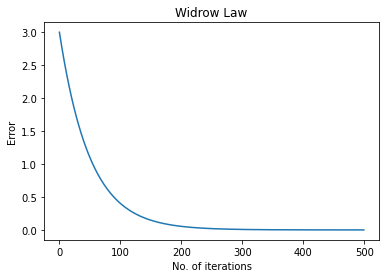



Orthonormal
By computation
[[ 1.00000000e+00  1.05869545e-16 -6.83580866e-17]
 [-1.25328876e-16  1.00000000e+00  1.81757295e-16]
 [ 1.86204198e-16 -1.43029468e-17  1.00000000e+00]]
Error:  0.0

Hebbs Law
[[ 1.00000000e+00  5.55111512e-17 -1.66533454e-16]
 [ 5.55111512e-17  1.00000000e+00  5.55111512e-17]
 [-1.66533454e-16  5.55111512e-17  1.00000000e+00]]
Error:  [0.0]

Widrow Law
[[ 9.93429517e-01  3.22020251e-17 -6.12456164e-17]
 [ 4.45379242e-18  9.93429517e-01  4.45379242e-18]
 [-5.69163032e-18  1.37742963e-18  9.93429517e-01]]
Error:  0.00013214


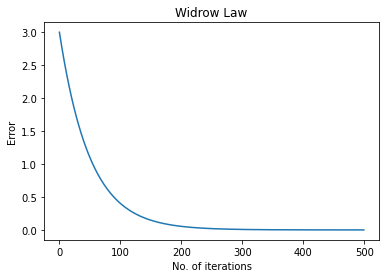



Linear Independent
By computation
[[ 1.00000000e+00  2.77555756e-16 -8.32667268e-17]
 [-2.22044605e-16  1.00000000e+00 -5.55111512e-17]
 [ 1.38777878e-16  5.55111512e-17  1.00000000e+00]]
Error:  0.0

Hebbs Law
[[70. 50. 60.]
 [50. 45. 55.]
 [60. 55. 95.]]
Error:  [15626.0, 64286.0, 145994.0, 260750.0, 408554.0]


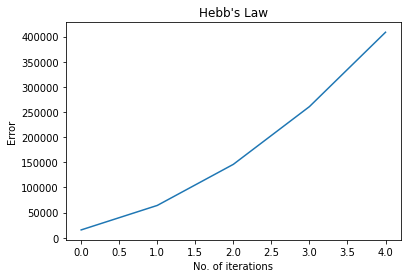


Widrow Law
[[ 0.99767688  0.00441859 -0.00114469]
 [ 0.00441859  0.99159579  0.00217721]
 [-0.00114469  0.00217721  0.99943597]]
Error:  0.00011588


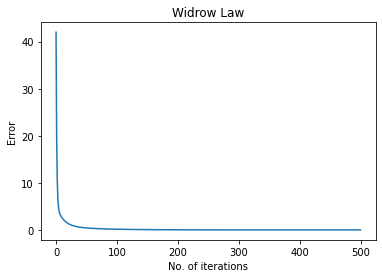



Linear Dependent
By computation
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]
Error:  0.0

Hebbs Law
[[105.  60. 165.]
 [ 60.  45. 105.]
 [165. 105. 270.]]
Error:  [181732.0, 735892.0, 1662508.0, 2961580.0, 4633108.0]


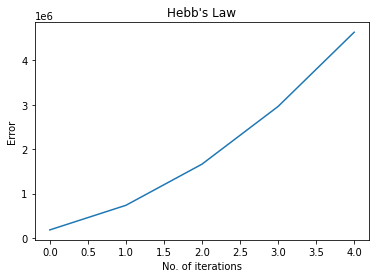


Widrow Law
[[ 0.6665584  -0.33320736  0.33335104]
 [-0.33320736  0.66652009  0.33331273]
 [ 0.33335104  0.33331273  0.66666377]]
Error:  1.1e-07


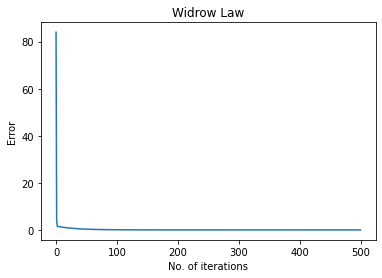

In [ ]:
input = [x_1, x_2, x_ot, x_on, x_li,x_ld]
input_tags = ['Condition :1: L<=M', 'Condition : 2 - L>M','Orthogonal', 'Orthonormal','Linear Independent','Linear Dependent']

for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],input[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],input[i])
  W_widrow, err_widrow = weights_by_widrow(input[i],input[i],500,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()
  print("Hebbs Law")
  print(W_hebb)
  print("Error: ",err_hebb)
  import matplotlib.pyplot as plt
  if (err_hebb[0] != 0):
    plt.plot(list(range(5)), err_hebb)
    plt.title("Hebb's Law")
    plt.xlabel("No. of iterations")
    plt.ylabel("Error")
    plt.show()
  print()
  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[499],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(500)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()


## Inferences and Conclusion : State all the key observations and conclusion

### Limitation of no. of patterns to input dimensionality

Condition :1: L<=M : 

In this case, as no of data pts is less than the dim of input, the optimal weights have been generated from weights by computation and widrow's method. But as the data is generated randomly, the hebb's law error does not converge.

Condition : 2 - L>M : 

In this case, as no of data pts is greater than the dim of input, but still the optimal weights have been generated from weights by computation and widrow's method. But as the data is generated randomly, the hebb's law error does not converge. This is because, this is auto association task, wherein the input and outputs are same. Thus, if we see weights by computation,

W = B.A+, as B = A, W = A.A+.

Thus, o/p = W.A = A.A+.A = A, thus input and output are the same.

Thus, the limitation of no. of patterns to input dimensionality is not seen in the case of auto association task here.



### Effects of Inputs:

1 . Orthogonal : 

Observations : The optimal weights are found by all the three methods and the erro has converged to zero.

2. Orthonormal : 

Observations : The optimal weights are found by all the three methods and the erro has converged to zero.

3. Linearly independent : 

Observations : The optimal weights are being computed by weights by computation method and widrow's learning law. But the error did not converge in Hebb's Law and the error goes on increasing in this case.

4. Linearly Dependent : 

Observations : The optimal weights are being computed by weights by computation method and widrow's learning law. But the error did not converge in Hebb's Law and the error goes on increasing in this case.

Theory : 
For Hebb's Law Behavior : 

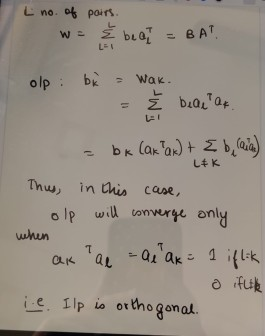

Thus, this justifies the behavior ofThe Hebb's Law to converge only for Orthogonal and otrhonormal inputs.

#### Conclusions : 

1. For orthogonal and orthonormal input vectors the optimum weights W = B(A.T) can be
obtained using Hebb's learning law. 

2. For linearly independent or dependent input vectors an approximation
to the optimum weights W = BA+ can be learnt using a form of Widrow's
learning law. 


# **Problem 2** : Demonstrate the working principle of two layer associative network performing heteroassociation task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
**Objective**: Demonstrate the working principle of two layer hetero-associative network.

**Hypothesis**: should be able to learn weights for hetero associative task.

**experiment datails**:
1. Demonstrated Limitation of no. of patterns to input dimensionality.
2. Overcame the limitation by modifying to pattern classification task.
3. modified the network - activation function

[[1 1 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]]
[[1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]]
[[1 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 1]
 [0 0 1 1 0]]
[[0 0 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]]
Condition :1: L<=M
By computation
[[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Error:  0.0

Widrow Law
[[0.99398142 0.00973826 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.99995683]]
Error:  5.045e-05


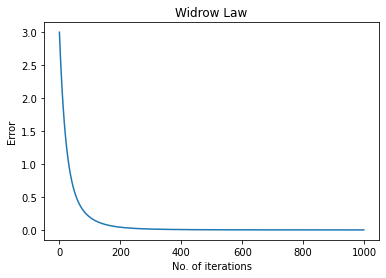



Condition : 2 - L>M
By computation
[[ 0.00000000e+00  0.00000000e+00  6.66666667e-01  6.66666667e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]]
Error:  0.06666667

Widrow Law
[[0.         0.         0.66666667 0.66666667]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.99398142 0.00973826 0.         0.        ]]
Error:  0.33338378


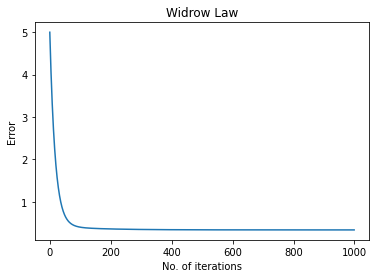

In [ ]:
import numpy as np
#Random Data
#Condition 1 : L <=M
L = 3
M = 4
x_1 = np.array([[1,1,0,0],[1,0,0,0],[0,0,0,1]]).T
y_1 = np.array([[1,0,0,0],[1,0,0,0],[0,0,0,1]]).T
print(x_1)
print(y_1)
#Condition 2 : L > M
L = 5
M = 4
x_2 = np.array([[1,1,0,0],[1,0,0,0],[0,0,0,1], [0,0,1,1],[0,0,1,0]]).T
y_2 = np.array([[0,0,0,1],[0,0,0,1],[1,0,0,0], [1,0,0,0], [1,0,0,0]]).T
print(x_2)
print(y_2)


input = [x_1, x_2]
output = [y_1, y_2]
input_tags = ['Condition :1: L<=M', 'Condition : 2 - L>M']

for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],output[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],output[i])
  W_widrow, err_widrow = weights_by_widrow(input[i],output[i],1000,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()

  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[999],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(1000)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()


In [ ]:
def weights_by_widrow_modified(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  #weights = np.array([[0,0,0],[0,0,0],[0,0,0]])## Initialise weights here
  n = A.shape[0]
  weights = np.zeros([n, n])
  err = []
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    op = 1 / (1 + np.exp(-(weights@A)))
    # print(op)
    #change in weight
    #d_wghts=(1/A.shape[1])*(learning_rate*((B-op)@A.T))
    d_wghts=learning_rate*((B-op)@A.T)
    #update weight
    weights=weights+d_wghts
    #error computaion
    error=sum(sum(np.square(B-op)))
    err.append(error)


  return weights,err

Condition :1: L<=M
By computation
[[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Error:  0.0

Widrow Law
[[ 2.61780483  1.00742814  0.         -2.17813569]
 [-2.61780483 -1.00742814  0.         -2.17813569]
 [-2.61780483 -1.00742814  0.         -2.17813569]
 [-2.61780483 -1.00742814  0.          2.17813569]]
Error:  0.06270209


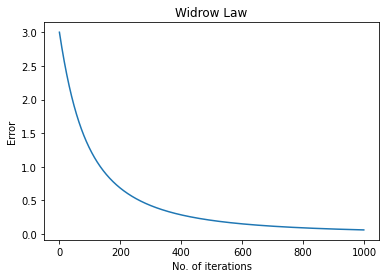



Condition : 2 - L>M
By computation
[[ 0.00000000e+00  0.00000000e+00  6.66666667e-01  6.66666667e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]]
Error:  0.06666667

Widrow Law
[[-2.61780483 -1.00742814  2.42192287  2.42192287]
 [-2.61780483 -1.00742814 -2.42192287 -2.42192287]
 [-2.61780483 -1.00742814 -2.42192287 -2.42192287]
 [ 2.61780483  1.00742814 -2.42192287 -2.42192287]]
Error:  0.07472102


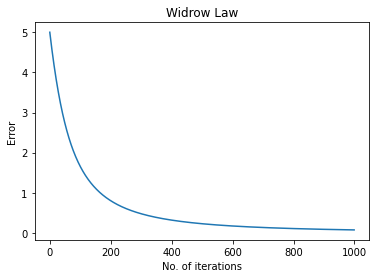

In [ ]:
for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],output[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],output[i])
  W_widrow, err_widrow = weights_by_widrow_modified(input[i],output[i],1000,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()

  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[999],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(1000)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()

In [ ]:
def weights_by_widrow_modified2(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  #weights = np.array([[0,0,0],[0,0,0],[0,0,0]])## Initialise weights here
  n = A.shape[0]
  weights = np.zeros([n, n])
  err = []
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    op = 1*(weights@A >0)
    # print(op)
    #change in weight
    #d_wghts=(1/A.shape[1])*(learning_rate*((B-op)@A.T))
    d_wghts=learning_rate*((B-op)@A.T)
    #update weight
    weights=weights+d_wghts
    #error computaion
    error=sum(sum(np.square(B-op)))
    err.append(error)


  return weights,err

Condition :1: L<=M
By computation
[[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Error:  0.0

Widrow Law
[[0.02 0.01 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.01]]
Error:  0


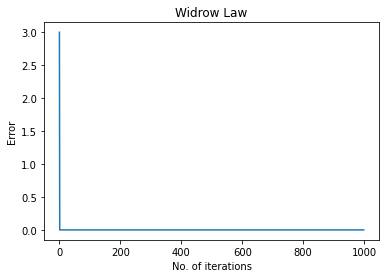



Condition : 2 - L>M
By computation
[[ 0.00000000e+00  0.00000000e+00  6.66666667e-01  6.66666667e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00]]
Error:  0.06666667

Widrow Law
[[0.   0.   0.02 0.02]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.02 0.01 0.   0.  ]]
Error:  0


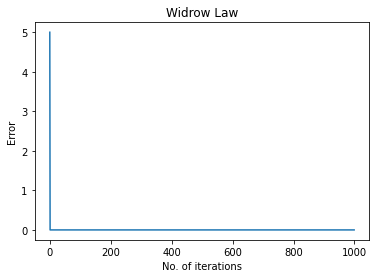

In [ ]:
for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],output[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],output[i])
  W_widrow, err_widrow = weights_by_widrow_modified2(input[i],output[i],1000,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()

  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[999],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(1000)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()

[[0.99557727 0.27009583 0.97310017]
 [0.36348033 0.50656547 0.21057651]
 [0.07119018 0.20572182 0.4120705 ]
 [0.00495371 0.00132782 0.62399239]]


[[0.71705111 0.76461725 0.76899642]
 [0.86692057 0.57641348 0.12973348]
 [0.68305377 0.17847661 0.54716575]
 [0.96435819 0.79975797 0.47782374]]



[[0.51425266 0.49481372 0.15138514 0.04349568 0.6373744  0.33935035]
 [0.78510232 0.52956746 0.06910247 0.6639596  0.85394119 0.32805659]
 [0.45145069 0.82288036 0.87647224 0.27929331 0.59530881 0.3355328 ]]


[[0.7109794  0.1239054  0.05640864 0.74596314 0.82154387 0.80391397]
 [0.27158746 0.72057791 0.4794123  0.41525094 0.31252387 0.44769902]
 [0.41639794 0.17323848 0.1226133  0.64293787 0.75175341 0.07773907]]
Condition :1: L<=M
By computation
[[ 0.26189322  1.14707946  0.54787803  0.07505815]
 [ 0.55172939  0.92200768 -0.18738093 -0.83990367]
 [ 0.68085273  0.04043041 -0.12514785 -0.11589263]
 [ 0.50490824  1.24653857  0.15874571 -0.54713602]]
Error:  0.0

Widrow Law
[[ 0.26232012  1.1465251

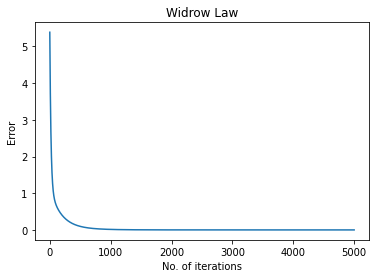



Condition : 2 - L>M
By computation
[[-0.01056147  1.08096367 -0.15295029]
 [-0.26516862  0.24179589  0.69579008]
 [-0.57233344  0.99412795  0.08084754]]
Error:  0.09771942

Widrow Law
[[-0.00925682  1.0803641  -0.1532744 ]
 [-0.26364212  0.24109436  0.69541086]
 [-0.56941665  0.9927875   0.08012293]]
Error:  0.58631833


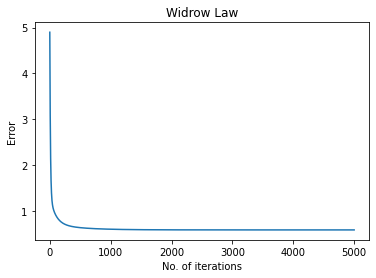

In [ ]:
import numpy as np
#Random Data
#Condition 1 : L <=M
L = 3
M = 4
x_1 = np.random.random((L, M)).T
y_1 = np.random.random((L, M)).T
print(x_1)
print('\n')
print(y_1)
print('\n\n')
#Condition 2 : L > M
L = 6
M = 3
x_2 = (np.random.random((L, M))).T
y_2 = np.random.random((L, M)).T
print(x_2)
print('\n')
print(y_2)



input = [x_1, x_2]
output = [y_1, y_2]
input_tags = ['Condition :1: L<=M', 'Condition : 2 - L>M']

for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],output[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],output[i])
  W_widrow, err_widrow = weights_by_widrow(input[i],output[i],5000,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()

  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[4999],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(5000)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()


In [ ]:
y_1 = 1*(y_1 > 0.5)
print(y_1)
print('\n')
#Condition 2 : L > M
y_2 = 1*(y_2 > 0.5)
print(y_2)
print('\n')

[[1 1 1]
 [1 1 0]
 [1 0 1]
 [1 1 0]]


[[1 0 0 1 1 1]
 [0 1 0 0 0 0]
 [0 0 0 1 1 0]]




In [ ]:
def weights_by_widrow_modified3(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  #weights = np.array([[0,0,0],[0,0,0],[0,0,0]])## Initialise weights here
  n = A.shape[0]
  weights = np.zeros([n, n])
  err = []
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    op = 1*(weights@A >0.5)
    # print(op)
    #change in weight
    #d_wghts=(1/A.shape[1])*(learning_rate*((B-op)@A.T))
    d_wghts=learning_rate*((B-op)@A.T)
    #update weight
    weights=weights+d_wghts
    #error computaion
    error=sum(sum(np.square(B-op)))
    err.append(error)


  return weights,err

Condition :1: L<=M
By computation
[[ 0.41449434  1.48753363  0.65371654  0.02249793]
 [ 0.35895866  1.7821686   0.00880449 -1.16702328]
 [ 1.21769646 -0.52538427 -0.30557295  0.08271024]
 [ 0.35895866  1.7821686   0.00880449 -1.16702328]]
Error:  0.0

Widrow Law
[[ 0.60492777  0.55933734  0.26738244  0.1082512 ]
 [ 0.3945403   0.71082174  0.17278226 -0.1714198 ]
 [ 0.45347012  0.13662019  0.10092355  0.12608644]
 [ 0.3945403   0.71082174  0.17278226 -0.1714198 ]]
Error:  0


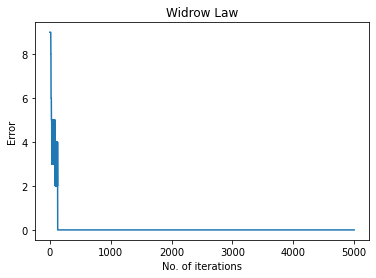



Condition : 2 - L>M
By computation
[[-0.14612892  1.54173238 -0.32029121]
 [ 0.38337956 -0.2612277   0.3488255 ]
 [-1.36745229  1.50483131  0.05993812]]
Error:  0.32601292

Widrow Law
[[ 1.07287345  1.341896   -0.9055299 ]
 [ 0.18710898  0.16932674  0.39480144]
 [-0.2614769   0.67888452  0.2247355 ]]
Error:  0


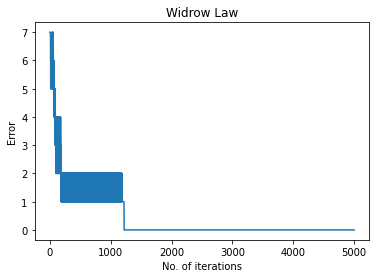

In [ ]:

input = [x_1, x_2]
output = [y_1, y_2]
input_tags = ['Condition :1: L<=M', 'Condition : 2 - L>M']

for i in range(len(input)):
  print(input_tags[i])
  W_hebb, err_hebb = weights_by_hebbian(input[i],output[i],5,1)
  W_comp, err_comp = weights_by_computation(input[i],output[i])
  W_widrow, err_widrow = weights_by_widrow_modified3(input[i],output[i],5000,0.01)

  print("By computation")
  print(W_comp)
  print("Error: ", err_comp)
  print()

  print("Widrow Law")
  print(W_widrow)
  print("Error: ",np.round(err_widrow[4999],8))
  import matplotlib.pyplot as plt
  plt.plot(list(range(5000)), err_widrow)
  plt.title("Widrow Law")
  plt.xlabel("No. of iterations")
  plt.ylabel("Error")
  plt.show()


  print()
  print()


## Inferences and Conclusion : State all the key observations and conclusion

###1. For M>L (M=4, L=3), weights are learnt properly. Error = 0 using both weights by computation and widrow.
###2. For M<L (M=4, L=5), weights are not properly learnt.
###Error for weights by computation = 0.066
###Error for widrow = 0.33
###3. For classification problem, M>L (M=4, L=5):
###a) widrow learned weights with error = 0.074 after changing activation to sigmoid. (1000 epochs).
###b) widrow learned weights with error = 0 after changing activation to unit step.

